In [10]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
def gen_profile(n, s):
    permutations = list(product(np.arange(s + 1), repeat=n))
    profile = [i for i in permutations if np.sum(i) == s]
    return np.array(profile)
profile = gen_profile(3,5)



def game(n,s,iterations,c):
    #propensity
    all_theta_a=[]
    all_theta_b=[]

    #initialize propensity:
    theta_a=np.ones(len(profile))*c
    theta_b=np.ones(len(profile))*c

    #frequency
    freq_a=np.zeros(len(profile))
    freq_b=np.zeros(len(profile))

    #list of all moves
    all_moves_a=[]
    all_moves_b=[]

    #current move
    current_move_a=0
    current_move_b=0

    #all probability
    probability_a=[]
    probability_b=[]

    #current_probability
    p_a=np.zeros(len(profile))
    p_b=np.zeros(len(profile))
    
    probability_a.append(p_a)
    probability_b.append(p_b)

    for time in range(iterations):
        #probability in terms of propensity
        p_a=theta_a/sum(theta_a)
        p_b=theta_b/sum(theta_b)
        
        #find next action
        current_move_a=get_action(current_move_a,current_move_b,p_a)
        current_move_b=get_action(current_move_b,current_move_a,p_b)

        #update propensity
        theta_a=propensity_update(current_move_a,current_move_b,theta_a)
        theta_b=propensity_update(current_move_b,current_move_a,theta_b)
    
        
        #store moves,propensity,probability distrib
        all_moves_a.append(current_move_a)
        all_moves_b.append(current_move_b)
    
        all_theta_a.append(theta_a)
        all_theta_b.append(theta_b)
    
        probability_a.append(probability_a[-1]+p_a)
        probability_b.append(probability_b[-1]+p_b)
    
        freq_a[current_move_a]+=1
        freq_b[current_move_b]+=1
    return freq_a,p_a,p_b,probability_a,probability_b,all_moves_a
    

In [11]:
def util(strat_me,strat_opp):
        return sum(np.sign(profile[strat_me]-profile[strat_opp]))

    

    

In [12]:
def get_action(strat_me,strat_opp,p):
    
    distribution=np.cumsum(p)
    
    r=random.uniform(0,1)
    if r>=0 and r<distribution[0]:
        return 0
    for i in range(len(distribution)-1):
        if r>=distribution[i] and r<distribution[i+1]:
            return i+1
        
    
    

In [13]:
def propensity_update(strat,strat_opp,theta):
    if(util(strat,strat_opp)>0):
        return (theta+util(strat,strat_opp)*np.array([0 if i!=strat else 1 for i in range(len(profile))]))
    return theta

0.161 0.385


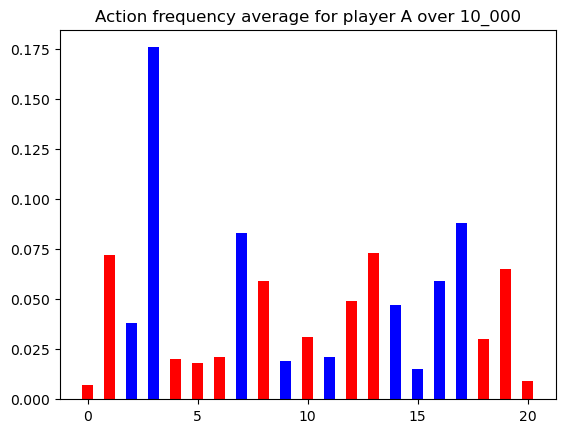

In [23]:
#X=S
g=game(3,5,iterations,1+0.01)

X=g[0]
CE=[[0,3,2],[0,2,3],[1,1,3],[2,0,3],[1,3,1],[3,2,0],[2,3,0],[3,0,2],[3,1,1]]
plt.bar(range(len(profile)), X/iterations, color = ['b' if (list(x) in CE) else 'r' for x in profile], 
        width = 0.5)
plt.title('Action frequency average for player A over 10_000')
print((X[7]+X[9]+X[16])/sum(X),(X[2]+X[3]+X[11]+X[14]+X[15]+X[17])/sum(X))

In [15]:
S=np.zeros(len(profile))
T=10
iterations=1000
all_prob=[]
avg_distrib_a=[]
avg_distrib_b=[]
moves_a=[]

all_prob_a=[]
all_prob_b=[]
for c in tqdm(range(T)):
    g=game(3,5,iterations,c+0.01)
    S+=g[0]
    avg_distrib_a.append(g[1])
    avg_distrib_b.append(g[2])
    all_prob_a.append(g[3])
    all_prob_b.append(g[4])
    moves_a.append(g[5])

prob_a_final=np.array(avg_distrib_a)
    
S=S/T

print(np.shape(prob_a_final))

entropy = [-np.sum(prob_a_final[i] * np.log2(prob_a_final[i] + 1e-10)) for i in range(T)]  # Adding small epsilon to avoid log(0)
e_NE=[-np.sum(NE * np.log2(NE+ 1e-10)) for _ in range (T)]

100%|██████████| 10/10 [00:01<00:00,  8.20it/s]

(10, 21)


NameError: name 'NE' is not defined

(21,)
(10,)


Text(0.5, 1.0, ' Entropy vs C constant')

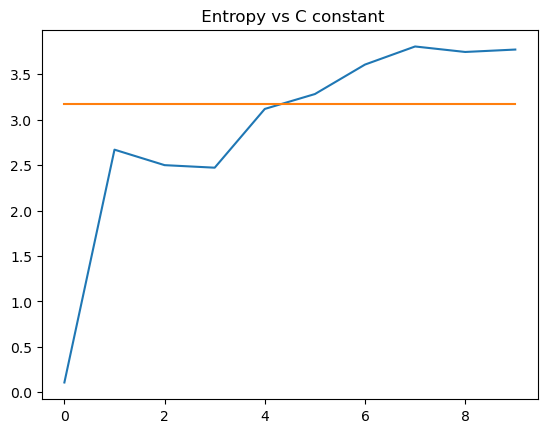

In [159]:
print(np.shape(prob_a_final[1]))
ent=np.array(entropy)
print(np.shape(ent))
plt.plot(range(T),ent)
plt.plot(e_NE)
plt.title(' Entropy vs C constant')


Text(0.5, 1.0, 'Probability')

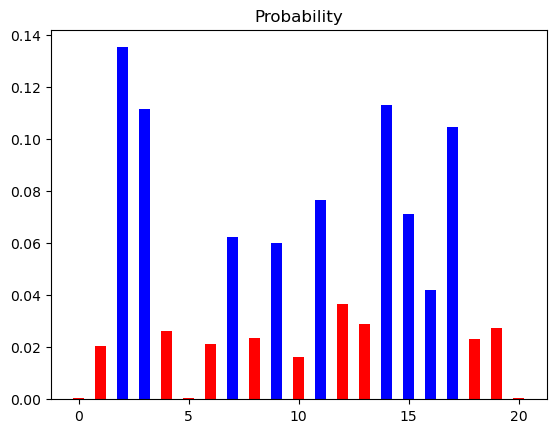

In [110]:
X=np.average(np.array(avg_distrib_a),axis=0)

plt.bar(range(len(profile)), X, color = ['b' if (list(x) in CE) else 'r' for x in profile], 
        width = 0.5)
plt.title('Probability')

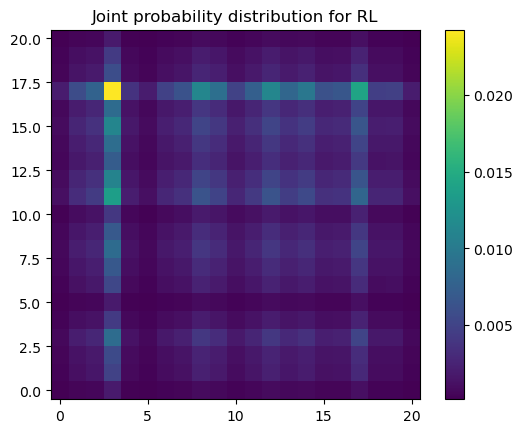

In [24]:


A=np.average(np.array(avg_distrib_a),axis=0)
B=np.average(np.array(avg_distrib_b),axis=0)

dA=np.array(A)
dA=dA.reshape(-1, 1)
dB=np.array(B)
dB=dB.reshape(1,-1)
mat = np.matmul(dA,dB)

plt.imshow(mat, interpolation='nearest',origin='lower')
plt.title('Joint probability distribution for RL')
plt.colorbar()

(1, 1000001, 21)
(1000001, 21)
(1000000, 21)
(999999,)


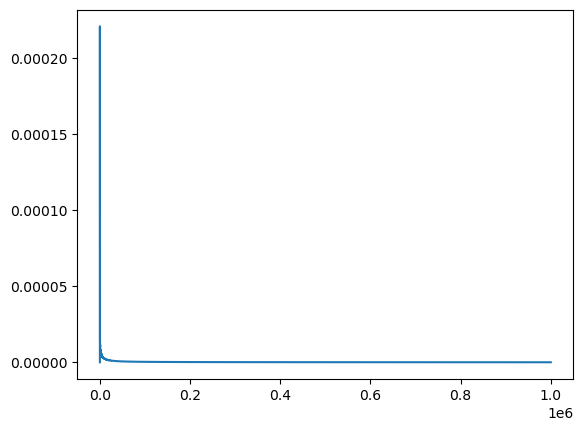

In [102]:
change_a=np.array(all_prob_a)
print(np.shape(all_prob_a))

avg_c_a=np.average(all_prob_a,axis=0)
#avg_c_a=[avg_c_a[i]/(i) for  i in range (1,iterations)]
print(np.shape(avg_c_a))
c_final=np.array([avg_c_a[i]/i for i in range (1,iterations+1)])
print(np.shape(c_final))
dist=[np.linalg.norm(c_final[i]-c_final[i-1]) for i in range (1,iterations)]
plt.plot(dist)
print(np.shape(dist))



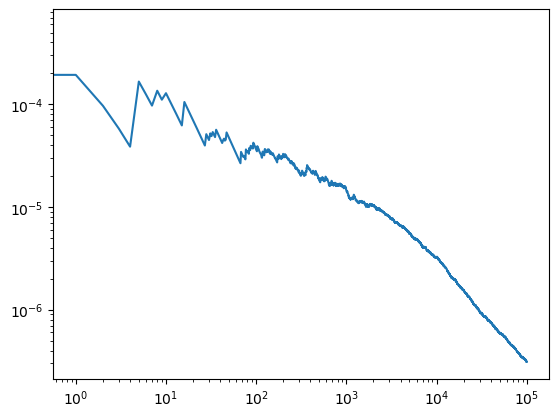

In [40]:
plt.loglog(dist)

Gradient of the best-fit line: -0.9246050558726503


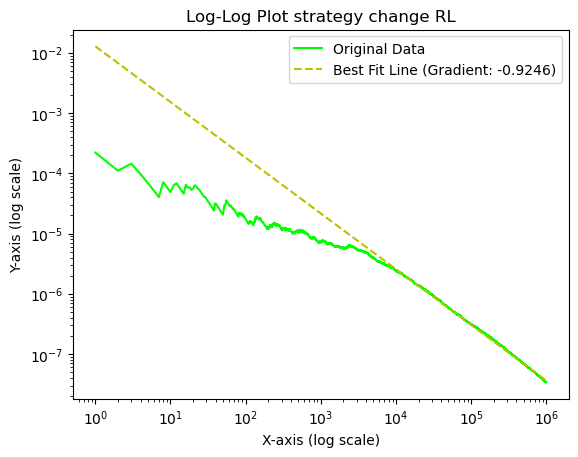

In [107]:
# Assuming 'data' is your array of data points
#data=all_regret_a
#data = np.array(data)

data=dist
data = np.array(data)
# Exclude zero values from the data
non_zero_indices = data > 0
data = data[non_zero_indices]

# Generate x values based on the number of non-zero data points
x = np.linspace(1, len(data), len(data))

# Take the logarithm of both x and y data
log_x = np.log(x)
log_data = np.log(data)

# Create a linear regression model in log-log space
slope, intercept = np.polyfit(log_x, log_data, 1)

# Generate the best-fitting line
best_fit_line = slope * log_x + intercept

# Display the gradient
print(f'Gradient of the best-fit line: {slope}')

# Create a log-log plot
plt.loglog(x, data, label='Original Data',color='lime')
plt.loglog(np.exp(log_x), np.exp(best_fit_line), label=f'Best Fit Line (Gradient: {slope:.4f})', linestyle='--',color='y')

# Customize the plot if needed
plt.title('Log-Log Plot strategy change RL')
plt.xlabel('X-axis (log scale)')
plt.ylabel('Y-axis (log scale)')
plt.legend()

# Show the plot
plt.show()

ValueError: operands could not be broadcast together with shapes (999999,) (1000000,) 

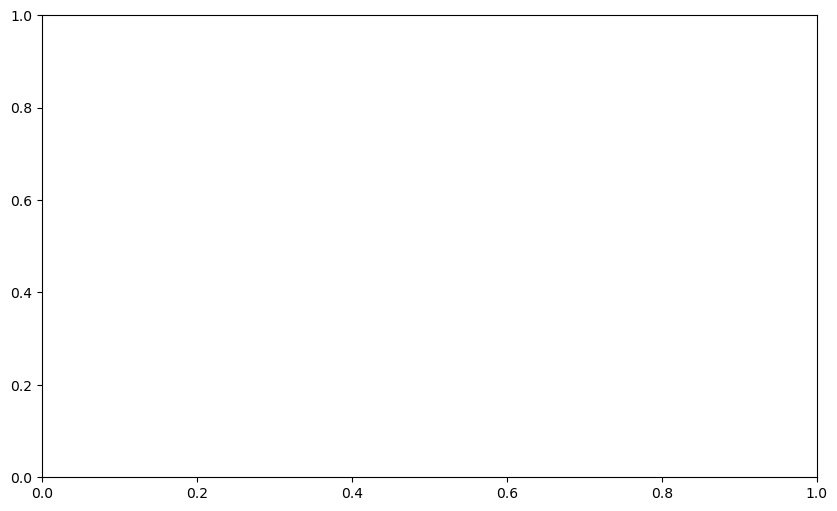

In [47]:
data=c_final

# Calculate cumulative sum along axis 1 to create stacked data
stacked_data = data# np.cumsum(data, axis=1)

# Create a stack plot
plt.figure(figsize=(10, 6))
plt.stackplot(range(1, iterations), stacked_data.T, labels=[i for i in ALL], alpha=0.7)
plt.title('Stack Plot of 21 Regions RL')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [13]:
print(profile)
ALL=[i for i in profile]
print(ALL)

[[0 0 5]
 [0 1 4]
 [0 2 3]
 [0 3 2]
 [0 4 1]
 [0 5 0]
 [1 0 4]
 [1 1 3]
 [1 2 2]
 [1 3 1]
 [1 4 0]
 [2 0 3]
 [2 1 2]
 [2 2 1]
 [2 3 0]
 [3 0 2]
 [3 1 1]
 [3 2 0]
 [4 0 1]
 [4 1 0]
 [5 0 0]]
[array([0, 0, 5]), array([0, 1, 4]), array([0, 2, 3]), array([0, 3, 2]), array([0, 4, 1]), array([0, 5, 0]), array([1, 0, 4]), array([1, 1, 3]), array([1, 2, 2]), array([1, 3, 1]), array([1, 4, 0]), array([2, 0, 3]), array([2, 1, 2]), array([2, 2, 1]), array([2, 3, 0]), array([3, 0, 2]), array([3, 1, 1]), array([3, 2, 0]), array([4, 0, 1]), array([4, 1, 0]), array([5, 0, 0])]


(100000,)
0.028818176177958805


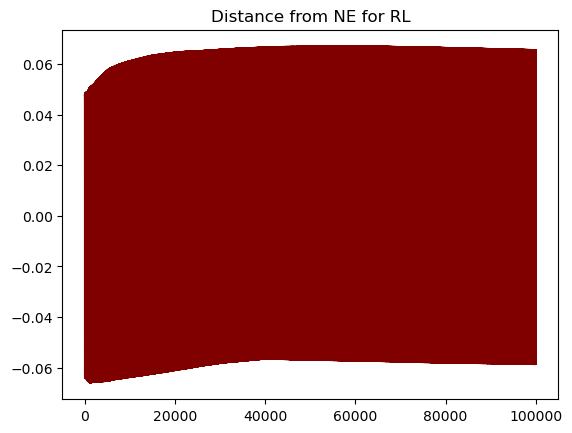

In [157]:

CE=[[0,3,2],[0,2,3],[1,1,3],[2,0,3],[1,3,1],[3,2,0],[2,3,0],[3,0,2],[3,1,1]]


NE=[1 if (list(x) in CE) else 0 for x in profile]
NE=np.array(NE)
NE=NE/sum(NE)
import math as math

x=np.array(c_final-NE)



#for i in range(3,len(all_regret_b)):
#    speed1=(x[i]-x[i-1])/(x[i-1]-x[i-2])
#    speed2=(x[i-1]-x[i-2])/(x[i-2]-x[i-3])
#    speed.append(math.log(abs(speed1))/math.log(abs(speed2)))

m_a=np.array(moves_a[8])
print(np.shape(m_a))

near=np.array([np.dot(np.array([1 if j==m_a[i] else 0 for j in range(21)]),(x[i])) for i in range(1,iterations)])

plt.plot(near,color='maroon')
plt.title('Distance from NE for RL')

print(near[-1])